Leetcode Scrapper

In [6]:
import requests

def get_html(url, method='GET', data=None):
    session = requests.Session()
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36',
        'Accept-Language': 'en-US,en;q=0.9',
        'Accept-Encoding': 'gzip, deflate, br',
        'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8',
        'Referer': 'https://www.google.com/',
        'Connection': 'keep-alive'
    }
    try:
        if method.upper() == 'POST':
            response = session.post(url, headers=headers, data=data)
        else:
            response = session.get(url, headers=headers)
        
        response.raise_for_status()  # Vérifie si la requête a réussi (status code 200)
        return response.text
    except requests.exceptions.RequestException as e:
        print(f"Erreur lors de la requête {method}: {e}")
        return None

url = "https://leetcode.com/contest/biweekly-contest-136/"
html_content = get_html(url)

if html_content:
    print(html_content)  
else:
    print("Impossible de récupérer le contenu HTML de la page.")

Erreur lors de la requête GET: 403 Client Error: Forbidden for url: https://leetcode.com/contest/biweekly-contest-136/
Impossible de récupérer le contenu HTML de la page.


In [1]:
labels = [
            "Circle",
            "Square",
            "Triangle",
            "RegularPolygon(5)",
            "RegularPolygon(6)",
            "Star",
            "Ellipse",
            "Rectangle",
            "Line",
            "Arrow",
            "Arc",
            "AnnularSector",
            "Brace",
            "Polygon",
            "RoundedRectangle",
            "Cross",
            "CurvedArrow",
            "DoubleArrow",
            "VGroup (Circle, Square)",
            "VGroup (Triangle, Square)",
            "VGroup (Rectangle, Ellipse)",
            "VGroup (Line, Arrow)",
            "VGroup (Star, RegularPolygon(7))",
            "DashedLine",
            "NumberPlane",
            "Axes",
            "ThreeDAxes",
            "Surface",
            "Sphere",
            "Cube",
            "Cone",
            "Cylinder",
            "Torus",
            "Dot",
            "Vector",
            "Matrix",
            "DecimalNumber",
            "Integer",
            "LabeledDot",
            "BraceLabel",
            "Line (with tip)",
            "DashedVMobject",
            "VMobject",
            "FunctionGraph",
            "ImplicitFunction",
            "Arrow3D",
            "Annulus",
            "Angle",
            "Sector",
            "ParametricFunction",
            "ArcBetweenPoints",
            "CurvedDoubleArrow",
            "RoundedRectangle (corner_radius=0.5, height=2, width=3)",
            "Arc (start_angle=0, angle=PI)",
            "Arc (radius=1, start_angle=PI/2, angle=PI)",
            "Ellipse (width=2, height=1)",
            "Rectangle (height=2, width=3, color=BLUE)",
            "ArcBetweenPoints (angle=PI/2)",
            "Circle (radius=0.5)",
            "Square (side_length=0.5)",
            "Triangle (scaled)",
            "Star (scaled)",
            "Ellipse (width=1, height=0.5)",
            "Rectangle (height=1, width=1.5)",
            "Line (start=ORIGIN, end=RIGHT)",
            "Arrow (start=ORIGIN, end=RIGHT)",
            "Vector (RIGHT)",
            "DoubleArrow (ORIGIN, RIGHT, buff=0.1)"
        ]
print(len(labels))

68


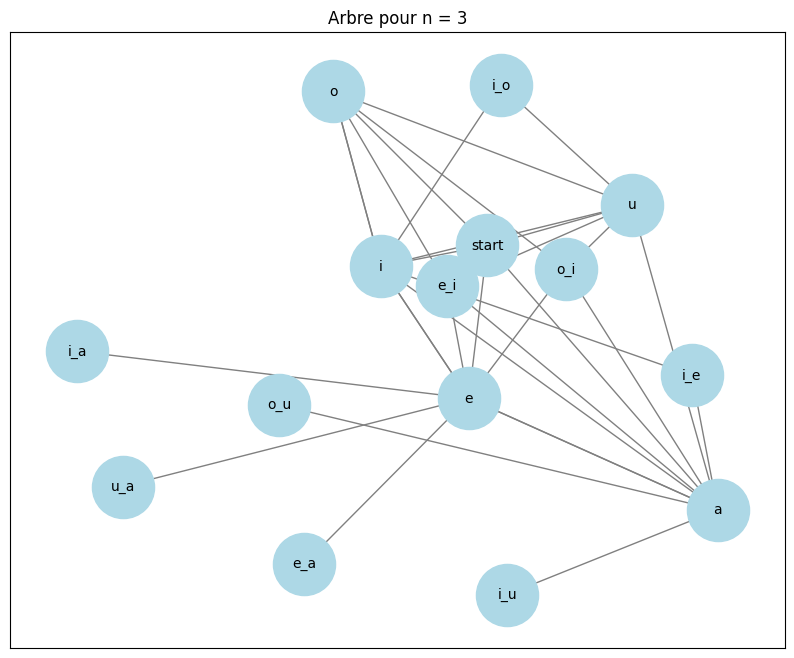

In [13]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()

edges = [
    ('start', 'a'), ('start', 'e'), ('start', 'i'), ('start', 'o'), ('start', 'u'),
    ('a', 'e'),
    ('e', 'a'), ('e', 'i'),
    ('i', 'a'), ('i', 'e'), ('i', 'o'), ('i', 'u'),
    ('o', 'i'), ('o', 'u'),
    ('u', 'a'),
    ('e_a', 'e'), ('e_i', 'a'), ('e_i', 'e'), ('e_i', 'o'), ('e_i', 'u'),
    ('i_a', 'e'), ('i_e', 'a'), ('i_e', 'i'), ('i_o', 'i'), ('i_o', 'u'), ('i_u', 'a'),
    ('o_i', 'a'), ('o_i', 'e'), ('o_i', 'o'), ('o_i', 'u'), ('o_u', 'a'),
    ('u_a', 'e')
]

second_level_labels = {
    'a': 'a', 'e': 'e', 'i': 'i', 'o': 'o', 'u': 'u',
    'e_a': 'e→a', 'e_i': 'e→i', 'i_a': 'i→a', 'i_e': 'i→e', 'i_o': 'i→o', 'i_u': 'i→u',
    'o_i': 'o→i', 'o_u': 'o→u', 'u_a': 'u→a'
}
for edge in edges:
    G.add_edge(edge[0], edge[1])
pos = nx.spring_layout(G, seed=42)
plt.figure(figsize=(10, 8))
nx.draw_networkx_nodes(G, pos, node_size=2000, node_color='lightblue')
nx.draw_networkx_edges(G, pos, edgelist=edges, arrowstyle='-|>', arrowsize=20, edge_color='gray')
nx.draw_networkx_labels(G, pos, font_size=10, font_color='black')

plt.title("Arbre pour n = 3")
plt.show()
